# Сборный проект

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-и-подготовка-данных" data-toc-modified-id="Изучение-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Ислледовательский-анализ-данных" data-toc-modified-id="Ислледовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ислледовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-жизненного-цикла-платформ" data-toc-modified-id="Изучение-жизненного-цикла-платформ-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение жизненного цикла платформ</a></span></li><li><span><a href="#Потенциально-прибыльные-платформы" data-toc-modified-id="Потенциально-прибыльные-платформы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Потенциально прибыльные платформы</a></span></li><li><span><a href="#Влияние-отзывов-критиков-и-пользователей-на-продажи" data-toc-modified-id="Влияние-отзывов-критиков-и-пользователей-на-продажи-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Влияние отзывов критиков и пользователей на продажи</a></span></li><li><span><a href="#Распределение-игр-по-жанрам-по-прибыльным-платформам" data-toc-modified-id="Распределение-игр-по-жанрам-по-прибыльным-платформам-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Распределение игр по жанрам по прибыльным платформам</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Изучение и подготовка данных

In [147]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats as st

In [148]:
data = pd.read_csv('/datasets/games.csv')

In [149]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [150]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div style="border:solid blue 1px; padding: 20px"> 
Заменим названия столбцов (приведем к нижнему регистру)

In [152]:
data.columns = data.columns.str.lower()

In [153]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="border:solid blue 1px; padding: 20px"> 
Заполним пропуски. Удалим строки, где не указано название игры, жанр, ее год выпуска.

In [155]:
data = data.dropna(subset=['name','year_of_release','genre'])

In [156]:
data.shape

(16444, 11)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [158]:
data['name'].value_counts()

Need for Speed: Most Wanted                                                                                                             12
Ratatouille                                                                                                                              9
LEGO Marvel Super Heroes                                                                                                                 9
FIFA 14                                                                                                                                  9
Madden NFL 08                                                                                                                            8
Madden NFL 07                                                                                                                            8
The LEGO Movie Videogame                                                                                                                 8
Terraria                   

In [159]:
data['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [160]:
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [161]:
data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

<div style="border:solid blue 1px; padding: 20px"> 
Изменим тип данных в стоблце "year_of_release" на целочисленный

In [162]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [164]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
7.5     249
8.5     247
7.9     246
8.1     237
7.7     236
7.3     232
8.4     221
7       216
7.6     213
7.4     213
8.6     209
6.8     191
8.7     186
7.1     180
8.8     179
7.2     166
8.9     151
6.6     145
6.9     138
6.3     135
6.7     125
6       123
6.5     121
9       119
6.2     112
6.4     105
5.8      97
9.1      89
6.1      82
5.7      77
5.9      76
5.6      72
5.4      71
5.3      70
5.5      69
5        64
5.2      54
4.8      49
5.1      44
9.2      43
4.9      39
4.6      37
4.3      37
4.4      33
4.5      32
4.1      31
9.3      31
3.8      27
4.2      27
4        27
3.5      26
4.7      24
2.8      24
3.4      23
3.1      23
3        21
3.7      19
3.6      18
3.3      15
3.9      13
3.2      12
2.5      12
9.4      11
2.4      11
2        10
2.9       9
1.7       9
2.1       9
2.7       7
2.2       6
1.8       5
9.5       5
1.4       5
2.6       4
1.2       3
1.6       3
9.6       2
0.5       2
0.3 

<div style="border:solid blue 1px; padding: 20px"> 
Изменим тип данных в столбце "user_score" на численный. Как мы видим, по 2376 позициям в столбце с оценкой пользователей стоит пометка - tbd, т.е. подлежит уточнению. Заменим эту пометку на пропуск.

In [165]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [167]:
data['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
78.0    233
76.0    228
72.0    223
74.0    223
77.0    218
68.0    217
79.0    217
81.0    214
69.0    205
83.0    205
82.0    204
66.0    200
65.0    191
67.0    182
84.0    178
63.0    176
62.0    169
64.0    167
61.0    162
59.0    154
60.0    152
58.0    149
85.0    149
86.0    133
57.0    129
87.0    116
88.0    114
56.0    109
55.0    109
89.0    104
53.0    100
54.0     96
51.0     89
49.0     85
50.0     76
90.0     75
52.0     73
91.0     68
47.0     64
48.0     64
46.0     54
43.0     52
92.0     52
44.0     49
93.0     47
45.0     46
39.0     39
42.0     36
94.0     36
38.0     34
41.0     29
37.0     28
36.0     26
40.0     26
35.0     26
33.0     21
96.0     18
95.0     16
32.0     15
30.0     12
26.0     11
97.0     11
28.0     10
34.0      9
31.0      9
27.0      8
25.0      7
19.0      6
23.0      4
98.0      4
24.0      4
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, dtype: i

In [168]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

<div style="border:solid blue 1px; padding: 20px"> 
Посчитаем суммарные продажи во всех регионах и добавим, полученные данные в таблицу.

In [169]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


<div style="border:solid blue 1px; padding: 20px"> 
Проверим данные на явные дубликаты.

In [172]:
data.duplicated().sum()

0

<div style="border:solid blue 1px; padding: 20px"> 
Явных дубликатов нет

### Вывод

<div style="border:solid blue 1px; padding: 20px"> 
В данных были обнаружены пропуски в колонках с названием игры, жанром, годом выпуска, оценками критиков и пользователей, а также рейтингом ESRB. Были удалены данные с пропусками в столбцах с названием игры, ее жанром и годом выпуска, так как эта информация является важной для дальнейшего исследования.
Также была добавлена информация по общей сумме продаж во всех регионах по каждой игре.

## Ислледовательский анализ данных

### Изучение жизненного цикла платформ

<div style="border:solid blue 1px; padding: 20px"> 
Посмотрим, сколько игр выпускалось в разные годы.

In [27]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values('name', ascending=False)

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


<AxesSubplot:xlabel='year_of_release'>

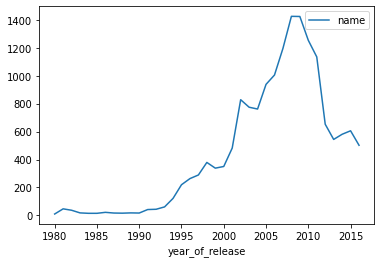

In [28]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot()

<div style="border:solid blue 1px; padding: 20px"> 
Резкий рост выпуска игр произошел в 1994-1995 гг. (было выпущено в 2 раза больше игр, чем в предущие года). Рост наблюдался вплоть до 2008 года. Далее мы видим тенденцию к снижению. Для дальнейшего изучения возьмем отрезок с 2000 по 2016 год.

In [29]:
data_2 = data.query('year_of_release >= 2000 and year_of_release <= 2016')

<AxesSubplot:xlabel='year_of_release'>

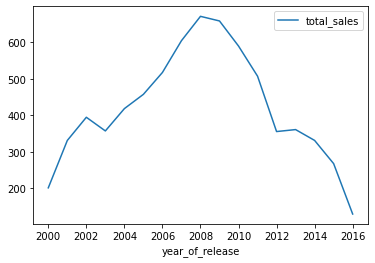

In [30]:
data_2.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot()

<div style="border:solid blue 1px; padding: 20px"> 
Отберем платформы с наибольшими суммарными продажами.

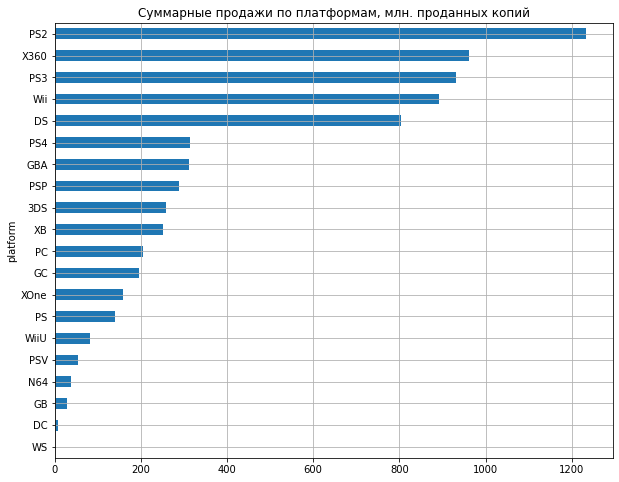

In [31]:
(data_2.groupby('platform')['total_sales'].agg('sum').sort_values()
 .plot(kind='barh', title='Суммарные продажи по платформам, млн. проданных копий', figsize=(10,8), grid=True))
plt.show()

<div style="border:solid blue 1px; padding: 20px"> 
Наибольшие суммарные продажи по платформам PS2, X360, PS3, Wii, DS. Построим по ним распределение по годам.

In [32]:
top_5_platform = data_2.query("platform == 'PS2' or platform == 'X360'or platform == 'PS3' or platform == 'Wii' or platform == 'DS'")

In [33]:
top_5_platform_pt = top_5_platform.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc=['count','sum'])
top_5_platform_pt.columns = ['games', 'sum']
display(top_5_platform_pt)

games     sum
platform year_of_release               
DS       2004                23   17.27
         2005               118  130.14
         2006               201  119.81
         2007               376  146.94
         2008               492  145.31
         2009               403  119.54
         2010               323   85.02
         2011               153   26.18
         2012                23   11.01
         2013                 8    1.54
PS2      2000                82   39.17
         2001               185  166.43
         2002               280  205.38
         2003               256  184.31
         2004               259  211.81
         2005               260  160.66
         2006               259  103.42
         2007               214   75.99
         2008               191   53.90
         2009                96   26.40
         2010                38    5.64
         2011                 7    0.45
PS3      2006                27   20.96
         2007                90   73.19
         2008               138  118.52
         2009               162  130.93
         2010               181  142.17
         2011               215  156.78
         2012               148  107.36
         2013               126  113.25
         2014               108   47.76
         2015                73   16.82
         2016                38    3.60
Wii      2006                44  137.15
         2007               185  152.77
         2008               282  171.32
         2009               325  206.97
         2010               253  127.95
         2011               143   59.65
         2012                31   21.71
         2013                12    8.59
         2014                 6    3.75
         2015                 4    1.14
         2016                 1    0.18
X360     2005                18    8.25
         2006                93   51.62
         2007               123   95.41
         2008               146  135.26
         2009               172  120.29
         2010               182  170.03
         2011               206  143.84
         2012               106   99.74
         2013                75   88.58
         2014                63   34.74
         2015                35   11.96
         2016                13    1.52

<div style="border:solid blue 1px; padding: 20px"> 
Жизненный цикл платформы составляет порядка 10-12 лет. Игры активно выпускаются в течение 5-6 лет. 2 из 5 самых крупных платформ уже прекратили свое существование. 3 других подходят к концу своего жизненного цикла. В 2017 году продолжат активно развиваться платформы, пока с меньшей длиной жизненного цикла и, как следствие, меньшими суммарными продажами.

<div style="border:solid blue 1px; padding: 20px"> 
Для дальнейшего исследования возьмем период за последние три года: 2014-2016.

In [34]:
good_data = data.query('year_of_release >= 2014')

### Потенциально прибыльные платформы

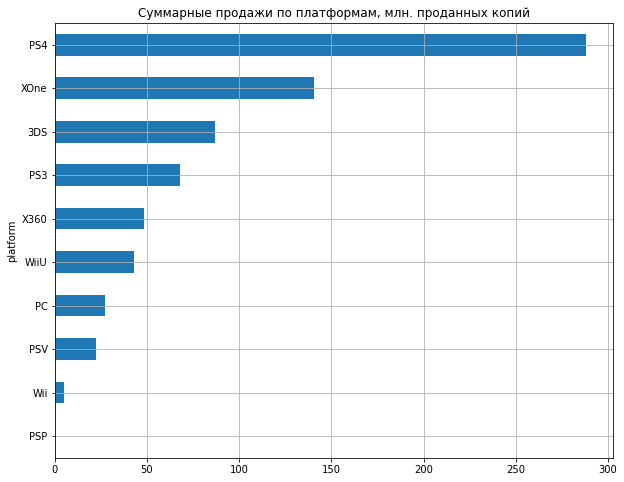

In [35]:
(good_data.groupby('platform')['total_sales'].agg('sum').sort_values()
 .plot(kind='barh', title='Суммарные продажи по платформам, млн. проданных копий', figsize=(10,8), grid=True))
plt.show()

Text(0.5, 1.0, 'Объем продаж по годам в разбивке по платформам, млн. проданных копий')

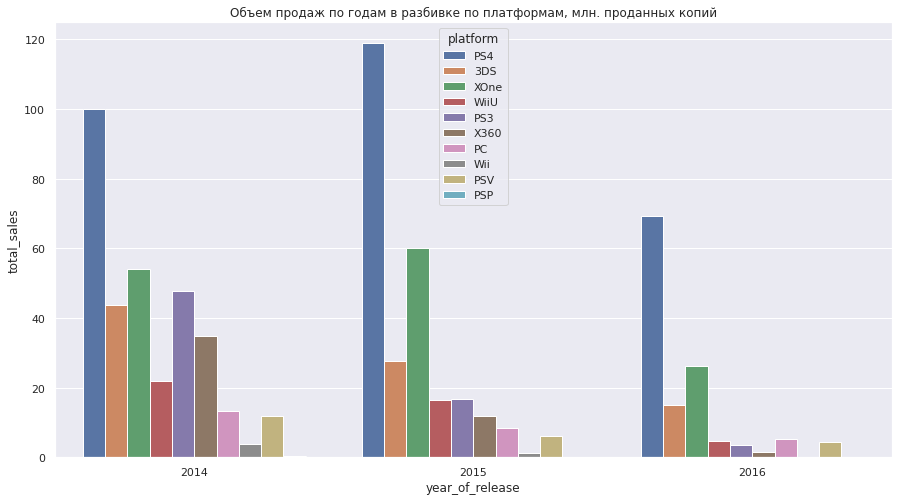

In [36]:
sb.set(rc = {'figure.figsize':(15,8)})
sb.barplot(data=good_data, x="year_of_release", y="total_sales", hue='platform', ci=None, estimator=sum)
plt.title('Объем продаж по годам в разбивке по платформам, млн. проданных копий')

<div style="border:solid blue 1px; padding: 20px"> 
По данным графикам можно сделать вывод, что крупнейшие платформы X360, PS3, Wii уходят с рынка. На их место пришли новые - PS4, 3DS, XOne, WiiU. Их жизненный цикл еще не закончится и они будут потенциально наиболее прибыльными в 2017 году. Также рассмотрим игры платформы PC, так как игры на компьютере всегда будут занимать долю на рынке.

<div style="border:solid blue 1px; padding: 20px"> 
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(0.5, 1.0, '«Ящик с усами» по глобальным продажам игр в разбивке по платформам')

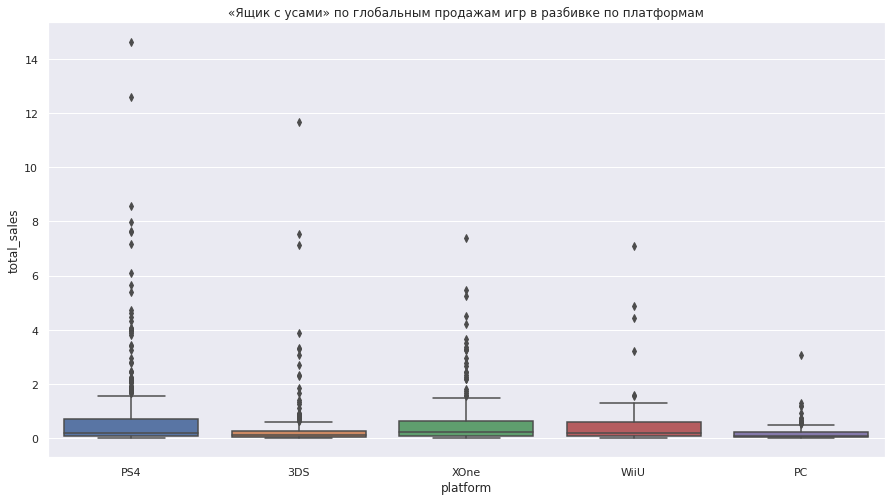

In [37]:
top_5 = good_data.query("platform == 'PS4' or platform == 'PC' or platform == '3DS' or platform == 'XOne' or platform == 'WiiU'")
sb.boxplot(x="platform", y="total_sales", data=top_5)
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')

Text(0.5, 1.0, '«Ящик с усами» по глобальным продажам игр в разбивке по платформам')

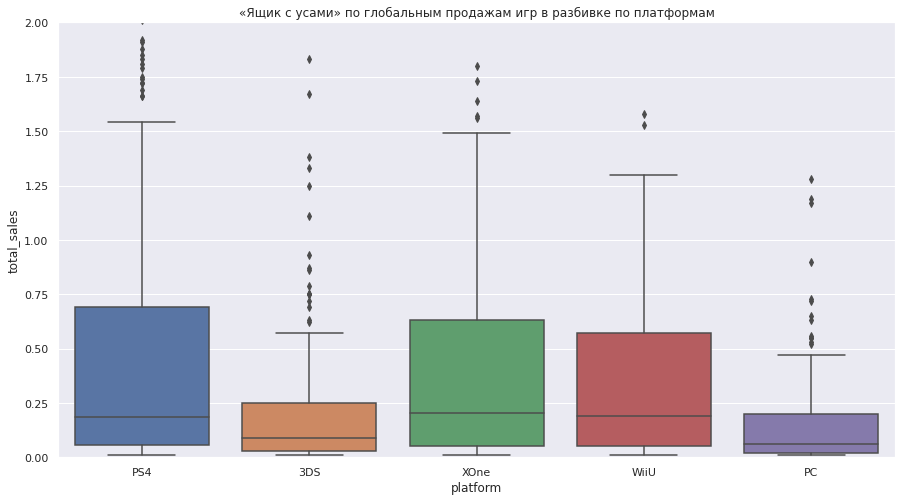

In [38]:
top_5 = good_data.query("platform == 'PS4' or platform == 'PC' or platform == '3DS' or platform == 'XOne' or platform == 'WiiU'")
sb.boxplot(x="platform", y="total_sales", data=top_5)
plt.ylim(0, 2)
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')

In [39]:
top_5.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,602.000000,632.000000,1040.000000
mean,2015.068269,0.220298,0.214933,0.064317,0.063163,73.024917,6.711551,0.562712
std,0.793472,0.531643,0.559581,0.263306,0.170990,12.114308,1.486007,1.272175
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.400000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,67.000000,6.000000,0.040000
50%,2015.000000,0.040000,0.040000,0.000000,0.010000,75.000000,7.000000,0.130000
75%,2016.000000,0.180000,0.170000,0.040000,0.040000,81.000000,7.800000,0.470000
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.300000,14.630000


<div style="border:solid blue 1px; padding: 20px"> 
Ориентировочная граница нормального размаха от 0 до 1.55 по PS4, до 0.6 по 3DS, до 0.45 по PC, до 1.5 по XOne, до 1.3 по WiiU. Значения свыше данных границ считаются выбросами. В среднем продажи по PS4 составили ~0.18, по 3DS ~0.15, по PC ~0.1, по XOne ~0.2, по WiiU ~0.18 млн. копий.

### Влияние отзывов критиков и пользователей на продажи

<div style="border:solid blue 1px; padding: 20px"> 
Посмотрим, как влияют на продажи внутри популярных платформ отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Корреляция между отзывами пользователей и объемом продаж'}, xlabel='total_sales', ylabel='user_score'>

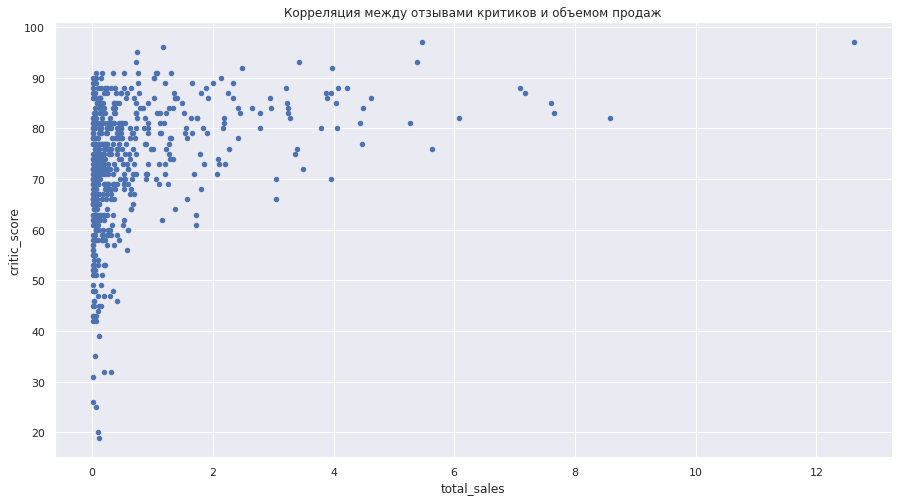

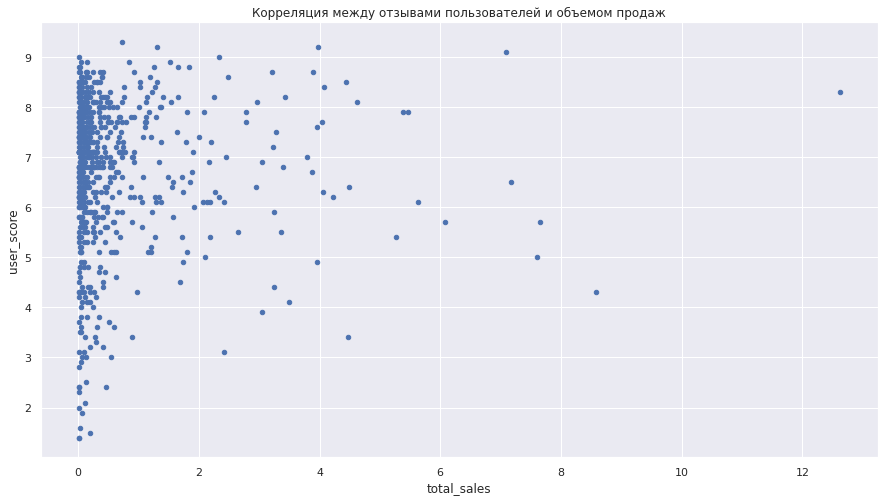

In [40]:
top_5.plot(x='total_sales', y='critic_score', kind='scatter', title='Корреляция между отзывами критиков и объемом продаж')
top_5.plot(x='total_sales', y='user_score', kind='scatter', title='Корреляция между отзывами пользователей и объемом продаж')

In [41]:
display(top_5['total_sales'].corr(top_5['critic_score']))
display(top_5['total_sales'].corr(top_5['user_score']))

0.33345900438641074

0.02557186788767202

In [42]:
display(good_data['total_sales'].corr(good_data['critic_score']))
display(good_data['total_sales'].corr(good_data['user_score']))

0.32810508696636304

-0.013070305002484562

<div style="border:solid blue 1px; padding: 20px"> 
Наблюдается положительная корреляция между отзывами критиков и продажами, как по самым 5 популярным платформам, так и по всем платформам в совокупности за период с 2009 по 2016 год (33,3% и 32,8% соответственно). Отзывы пользователей не оказывают существенного влияния на объем продаж.

###  Распределение игр по жанрам по прибыльным платформам

<div style="border:solid blue 1px; padding: 20px"> 
Посмотрим на общее распределение игр по жанрам по выбранным 5 прибыльным платформам.

<div style="border:solid blue 1px; padding: 20px"> 
Построим графики по общим продажам в разбивке по жанрам, а также отдельно в разбивке по платформам.

Text(0.5, 1.0, 'Самые популярные жанры')

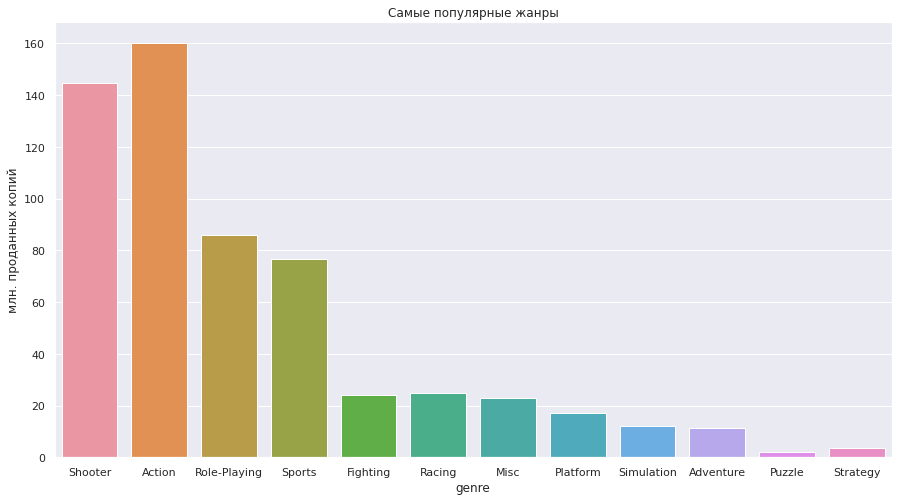

In [43]:
sb.barplot(data=top_5, x="genre", y="total_sales", ci=None, estimator=sum)
plt.ylabel('млн. проданных копий')
plt.title('Самые популярные жанры')

Text(0.5, 1.0, 'Самые популярные жанры в разбивке по платформам')

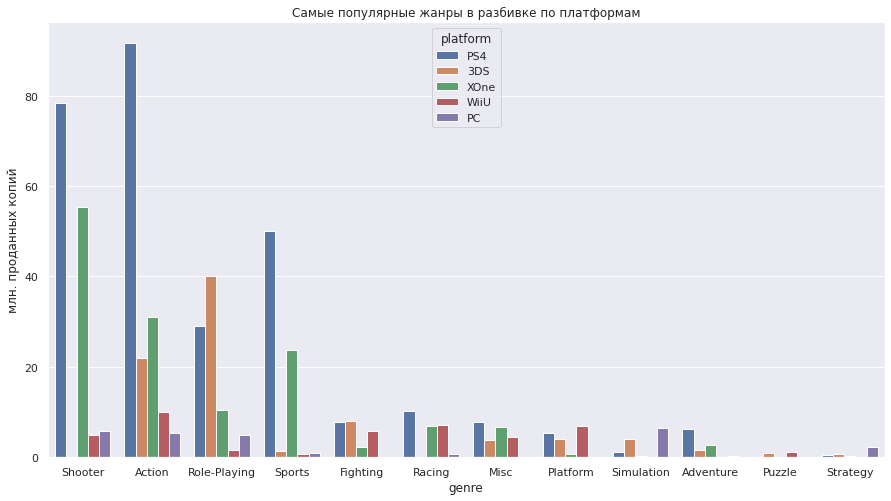

In [44]:
sb.barplot(data=top_5, x='genre', y='total_sales', hue='platform', ci=None, estimator=sum)
plt.ylabel('млн. проданных копий')
plt.title('Самые популярные жанры в разбивке по платформам')

<div style="border:solid blue 1px; padding: 20px"> 
Также построим графики по медианным продажам в разбивке по жанрам, а также отдельно в разбивке по платформам.

Text(0.5, 1.0, 'Самые популярные жанры')

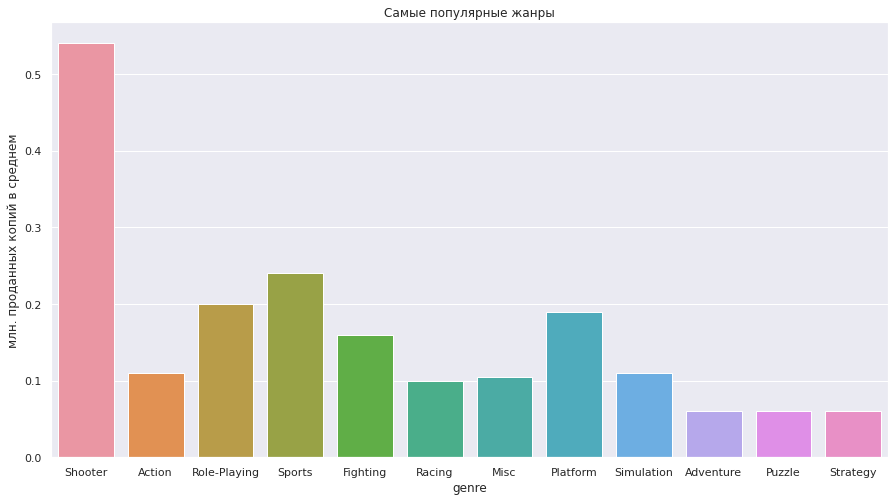

In [45]:
from numpy import median
sb.barplot(data=top_5, x="genre", y="total_sales", ci=None, estimator=median)
plt.ylabel('млн. проданных копий в среднем')
plt.title('Самые популярные жанры')

Text(0.5, 1.0, 'Самые популярные жанры в разбивке по платформам')

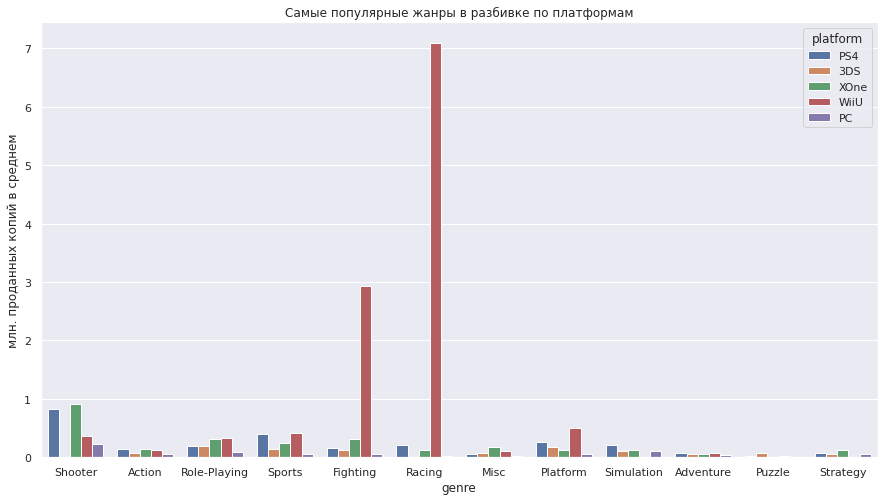

In [46]:
sb.barplot(data=top_5, x='genre', y='total_sales', hue='platform', ci=None, estimator=median)
plt.ylabel('млн. проданных копий в среднем')
plt.title('Самые популярные жанры в разбивке по платформам')

In [47]:
top_5.pivot_table(index=['platform','genre'],values='name', aggfunc='count')

name
platform genre             
3DS      Action          87
         Adventure       21
         Fighting         5
         Misc            20
         Platform         8
         Puzzle           7
         Role-Playing    41
         Simulation      10
         Sports           5
         Strategy         8
PC       Action          39
         Adventure        8
         Fighting         2
         Misc             3
         Platform         1
         Racing          13
         Role-Playing    18
         Shooter         21
         Simulation      18
         Sports          11
         Strategy        17
PS4      Action         142
         Adventure       28
         Fighting        17
         Misc            19
         Platform         9
         Puzzle           1
         Racing          18
         Role-Playing    51
         Shooter         38
         Simulation       6
         Sports          42
         Strategy         5
WiiU     Action          35
         Adventure        3
         Fighting         2
         Misc            13
         Platform         7
         Puzzle           3
         Racing           1
         Role-Playing     4
         Shooter          3
         Sports           2
XOne     Action          81
         Adventure       14
         Fighting         5
         Misc            17
         Platform         4
         Racing          18
         Role-Playing    14
         Shooter         36
         Simulation       3
         Sports          34
         Strategy         2

<div style="border:solid blue 1px; padding: 20px"> 
Самые высокие продажи по жанрам экшн, шутер, ролевые и спортивные игры. Также можно выделить, что каждая плафторма специализируется на том или ином жанре игры.  PS4 и XOne специализируются на экшн, шутер и спортивных играх, а 3DS - на ролевых.
    
Чтобы определить наиболее прибыльный жанр расммотрим медианные продажи. На третьем графике отображено, что в среднем продажи выше всего в шутерах - 0,55 млн. проданных копий. Также выделяются спортивные игры (около 0,25 млн.), ролевые игры и платформы (около 0,2 млн.).
    
Если рассмотреть средние продажи для каждой платформы, то здесь наблюдается выброс в жанре гонок по платформе WiiU - по ней в среднем продано 7 млн. копий, что выделяет ее среди конкурентов. Это объяснется тем, что на платформе размещена всего 1 игра в этом жанре. Поэтому мы не учитываем эти данные. На 2 месте на WiiU игры в жанре файтинг (3 млн. проданных копий), но это также выброс, так как на платформе размещены всего 2 игры в этом жанре. Поэтому мы также не учитываем эти данные.
Таким образом для WiiU, также как и для PS4, XOne, PC самый прибыльный жанр - шутер. Для 3DS это ролевые игры, в среднем 0,25 млн. проданных копий.

Исходя из вышеперечисленного можно сделать вывод, что самый прибыльный жанр шутинг.

###  Портрет пользователя каждого региона

<div style="border:solid blue 1px; padding: 20px"> 
Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы.

In [48]:
platform_svod = (top_5.pivot_table(index='platform', 
                                   values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum'))

Text(0, 0.5, 'млн. проданных копий')

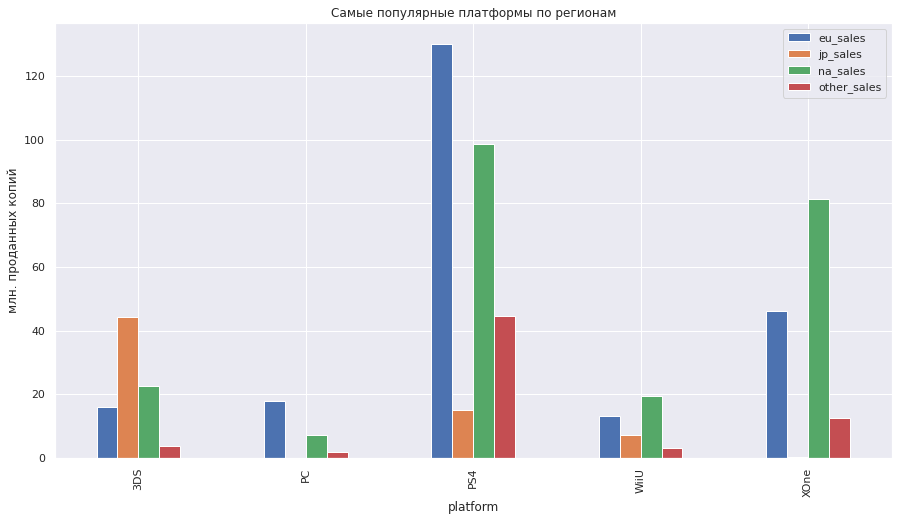

In [49]:
platform_svod.plot(kind='bar', title='Самые популярные платформы по регионам')
plt.ylabel('млн. проданных копий')

<div style="border:solid blue 1px; padding: 20px"> 
Самая популярная платформа в Европе и Северной Америке - PS4, в Японии - 3DS, в других регионах - также PS4. В Японии вообще не играют в PC, XOne. Статистику по PC можно объяснить тем, в Японии намного популярнее консоли. На компьютере практически никто не играет.

<div style="border:solid blue 1px; padding: 20px"> 
Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры игр.

Text(0, 0.5, 'млн. проданных копий')

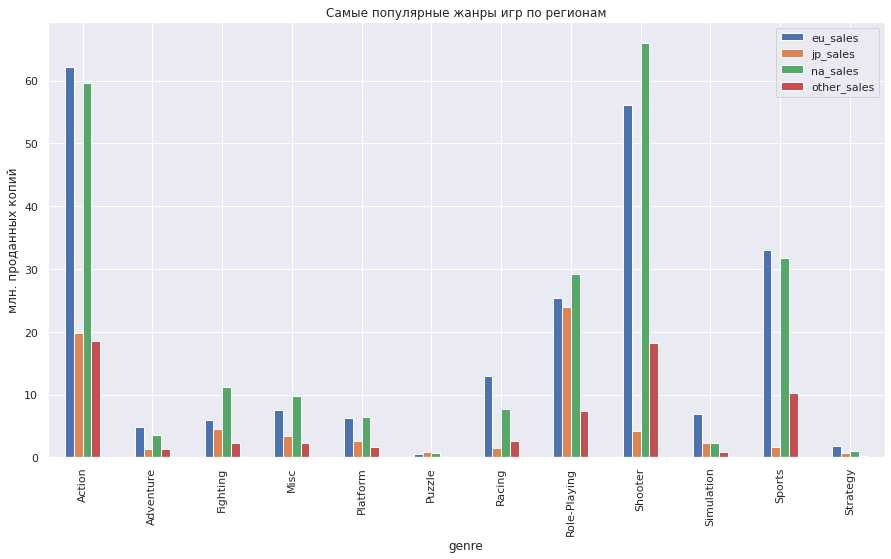

In [50]:
genre_svod = (top_5.pivot_table(index='genre', 
                                   values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum'))
genre_svod.plot(kind='bar', title='Самые популярные жанры игр по регионам')
plt.ylabel('млн. проданных копий')

<div style="border:solid blue 1px; padding: 20px"> 
Самый популярный жанр в Северной Америке и Европе - экшн и шутер, в Японии - ролевые игры, в других регионах - также экшн и шутер.

Интересно отметить, что предпочтения японских пользователей отличаются от пользователей из других регионов. Шутер, опулярный жанр в других регионах жанр - одно из самых непопулярных направлений японского гейминга. Первые места занимают ролевые  игры. Данную особенность можно объяснить национальными особенностями японцев. В Японии не распространены соревновательные игры, а отдается предпочтение тем, где есть элемент сотрудничества и мирного сосуществования. Отличительной чертой игр является отсутствие какой-либо конкуренции, стресса и негативных моментов.

<div style="border:solid blue 1px; padding: 20px"> 
Рассмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [51]:
top_5['rating'].value_counts(dropna=False)

NaN     394
M       194
T       172
E       155
E10+    125
Name: rating, dtype: int64

<div style="border:solid blue 1px; padding: 20px"> 
По 394 позициям не указан рейтинг. Для дальнейшего корректного анализа заменим пропуски на 'without rating'

/tmp/ipykernel_138/683844347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5['rating']=top_5['rating'].fillna('without rating')


Text(0, 0.5, 'млн. проданных копий')

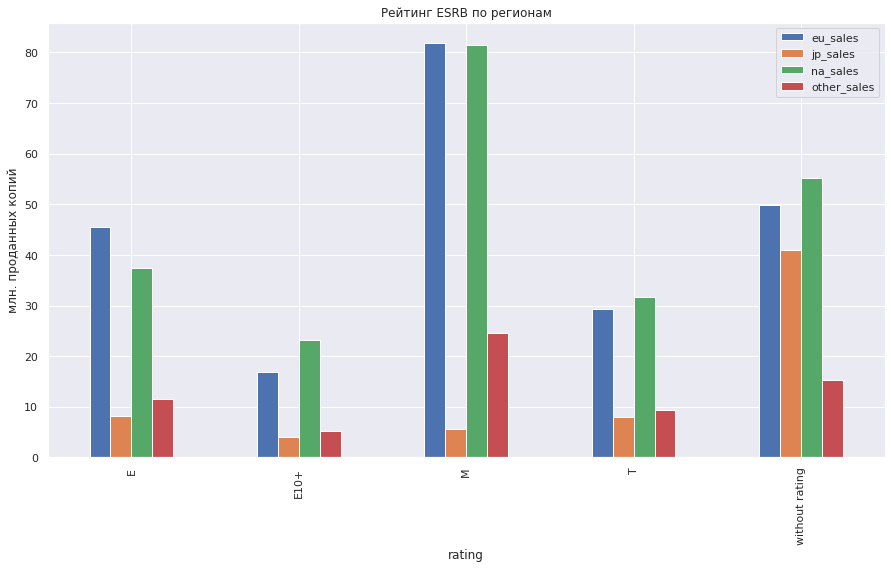

In [52]:
top_5['rating']=top_5['rating'].fillna('without rating')
rating_svod = (top_5.pivot_table(index='rating', 
                                   values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum'))
rating_svod.plot(kind='bar', title='Рейтинг ESRB по регионам')
plt.ylabel('млн. проданных копий')

In [ ]:
<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b>

Отлично, вижу заполнение пропусков значений в столбце с рейтингами на значение 'without rating'</div>

<div style="border:solid blue 1px; padding: 20px"> 
По данным пяти платформам получены 5 видов рейтинга: «E» («Everyone») — «Для всех», «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше», «M» («Mature») — «Для взрослых», «T» («Teen») — «Подросткам» и добавленный нами 'without rating'. Игры "Для взрослых", к которым относятся шутеры, самое популярное направление в Северной Америке, Европе и других регионах. В Японии больше всего игр без рейтинга.

###  Вывод

<div style="border:solid blue 1px; padding: 20px"> 
По проведенному анализу можно сделать следующие выводы:
    
    1) Резкий рост выпуска игр начался в 1994-1995 гг. (было выпущено в 2 раза больше игр, чем в предущие года). Рост наблюдался вплоть до 2008 года. Далее до наблюдаемого периода мы видим тенденцию к снижению выпуска игр.
    
    2) Потенциально прибыльные платформы в 2017 году - PS4, 3DS, XOne, WiiU, а также PC, т.к. компьютерные игры продолжают занимать свою нишу на рынке.
    
    3) Отзывы критиков оказывают влияние на рост продаж (корреляция составила 33,3% и 32,8% соответственно). В свою очередь отзывы пользователей не оказывают влияния на объем продаж.
    
    4) Самые популярные жанры - экшн (за 2014-2016 года было продано 160 млн. копий), шутер (145 млн. проданных копий), ролевые игры (85 млн. проданных копий), спортивные игры (75 млн. проданных копий). Самые низкие продажи в жанре пазлы (около 5 млн. проданных копий). Самый прибыльный жанр - шутер (в среднем 1,45 млн. проданных копий за рассматриваемый период).
    
    5) Каждая плафторма специализируется на том или ином жанре игры. PS4 и XOne специализируются на шутерах, играх в жанре экшн, спортивных играх. 3DS специализируется на ролевых, экшн играх. У WiiU - экшн. На компьютерах в основном играют в шутеры, ролевые и экшн игры, симуляции. 
    
    6) Самая популярная платформа в Европе и Северной Америке - PS4, в Японии - 3DS, в других регионах - также PS4. В Японии вообще не играют в PC, XOne. Статистику по PC можно объяснить тем, в Японии намного популярнее консоли. На компьютере практически никто не играет.
    
    7) Самый популярный жанр в Северной Америке и Европе - экшн и шутер, в Японии - ролевые игры и экшн, в других регионах - также экшн и шутер. Отличие предпочтений японских пользователей объясняется их менталитетом. Отличительной чертой японских игр является отсутствие какой-либо конкуренции, стресса и негативных моментов.
    
    8) Игры "Для взрослых", к которым относятся шутеры, самое популярное направление в Северной Америке, Европе и других регионах. В Японии более всего игр без рейтинга.

##  Проверка гипотез

<div style="border:solid blue 1px; padding: 20px"> 
Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. За нулевую гипотезу примем, что средние пользовательские рейтинги платформ Xbox One и PC равны. За альтернативную гипотезу, что средние рейтинги отличаются. Критический уровень статистической значимости примем равным 0,05. Предпологая, что дисперсии у генеральных совокупностей разные — укажим equal_var = False.

In [53]:
good_data_2 = good_data.copy()
good_data_2 = good_data_2.dropna()

In [54]:
data_xone = good_data_2.query("platform=='XOne'")
data_pc = good_data_2.query("platform=='PC'")

In [55]:
alpha = 0.05
results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.1498449186136679
Не получилось отвергнуть нулевую гипотезу


<div style="border:solid blue 1px; padding: 20px"> 
Не получилось отвергнуть нулевую гипотезу. Следовательно средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<div style="border:solid blue 1px; padding: 20px"> 
Гипотеза 2 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные. За нулевую гипотезу примем, что средние пользовательские рейтинги жанров Action и Sports равны. За альтернативную гипотезу, что средние рейтинги отличаются. Критический уровень статистической значимости примем равным 0,05. Предпологая, что дисперсии у генеральных совокупностей разные — укажим equal_var = False.

In [56]:
data_action = good_data_2.query("genre=='Action'")
data_sports = good_data_2.query("genre=='Sports'")

In [57]:
alpha = 0.05
results = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.474253245303909e-08
Отвергаем нулевую гипотезу


<div style="border:solid blue 1px; padding: 20px"> 
Нулевая гипотеза отвергнута, значит, действительно средние пользовательские рейтинги жанров Action и Sports разные.

###  Вывод

<div style="border:solid blue 1px; padding: 20px"> 
Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые была подтверждена.
Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны была отвергнута: они различаются.

##  Вывод

<div style="border:solid blue 1px; padding: 20px"> 
 По итогам проведенного исследования можно сделать следующие выводы:
    
    1) Резкий рост выпуска игр начался в 1994-1995 гг. (было выпущено в 2 раза больше игр, чем в предущие года). Рост наблюдался вплоть до 2008 года. Далее до наблюдаемого периода мы видим тенденцию к снижению выпуска игр.
    
    2) Жизненный цикл платформы составляет порядка 10-12 лет. Игры активно выпускаются в течение 5-6 лет.
    
    3) Для изучения был выбран период с 2014 года, последние три года наблюдений.
    
    4) Потенциально прибыльными платформами в 2017 году будут PS4, 3DS, XOne, WiiU, а также PC, т.к. компьютерные игры продолжают занимать свою нишу на рынке.
    
    5) Отзывы критиков оказывают влияние на рост продаж (корреляция составила 33,3% и 32,8% соответственно). В свою очередь отзывы пользователей не оказывают влияния на объем продаж.
    
    6) Самые популярные жанры - экшн (за 2014-2016 года было продано 160 млн. копий), шутер (145 млн. проданных копий), ролевые игры (85 млн. проданных копий), спортивные игры (75 млн. проданных копий). Самые низкие продажи в жанре пазлы (около 5 млн. проданных копий). Самый прибыльный жанр - шутер (в среднем 1,45 млн. проданных копий за рассматриваемый период).
    
    7) Каждая плафторма специализируется на том или ином жанре игры. PS4 и XOne специализируются на шутерах, играх в жанре экшн, спортивных играх. 3DS специализируется на ролевых, экшн играх. У WiiU - экшн. На компьютерах в основном играют в шутеры, ролевые и экшн игры, симуляции.
    
    8) Самая популярная платформа в Европе и Северной Америке - PS4, в Японии - 3DS, в других регионах - также PS4. В Японии вообще не играют в PC, XOne. Статистику по PC можно объяснить тем, в Японии намного популярнее консоли. На компьютере практически никто не играет.
    
    9) Самый популярный жанр в Северной Америке и Европе - экшн и шутер, в Японии - ролевые игры и экшн, в других регионах - также экшн и шутер. Отличие предпочтений японских пользователей объясняется их менталитетом. Отличительной чертой японских игр является отсутствие какой-либо конкуренции, стресса и негативных моментов.
    
    10) Игры "Для взрослых", к которым относятся шутеры, самое популярное направление в Северной Америке, Европе и других регионах. В Японии более всего игр без рейтинга.
    
    11) На прибыльность игры влияет жанр в зависимости от региона (самые популярные экшн, шутер в Северной Америке и Европе и ролевые игры в Японии), платформа (PS4 - экшн и шутер, 3DS - ролевые игры), рейтинг ("Для взрослых" в Европе и Америке), а также отзывы критиков.
    
    12) Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые была подтверждена. Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны была отвергнута: они различаются.